In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import numpy as np
import scanpy as sc
import pandas as pd
import anndata as ad
import seaborn as sns
import os

In [9]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [18]:
mouse_colors = plt.cm.colors.ListedColormap(['red', 'darkred', 'blue','darkblue', 'orange', 'darkorange', 'violet', 'darkviolet',])

samples = [
    "GSM6321073_PFC_4wk_1_matrix.h5",
    "GSM6321074_PFC_4wk_2_matrix.h5",
    "GSM6321075_PFC_4wk_3_matrix.h5",
    "GSM6321076_PFC_4wk_4_matrix.h5",
    "GSM6321077_PFC_90wk_1_matrix.h5",
    "GSM6321078_PFC_90wk_2_matrix.h5",
    "GSM6321079_PFC_90wk_3_matrix.h5",
    "GSM6321080_PFC_90wk_4_matrix.h5"
]

mouse_id = {
    0 : 1,
    1 : 1,
    2 : 2,
    3 : 2,
    4 : 3,
    5 : 3,
    6 : 4,
    7 : 4,
}

In [5]:
# Path to the directory containing all .h5 files
data_dir = "/Users/cmdb/qb25project/mouse-brain-RNAseq/GSE207848_RAW"

# List all h5 files in that directory
files = [f for f in os.listdir(data_dir) if f.endswith(".h5")]

# Initialize a list to store each sample's AnnData object
adatas = []

for f in files:
    # Load the data
    adata = sc.read_10x_h5(os.path.join(data_dir, f))
    
    # Optionally, give each cell a unique sample identifier
    sample_name = f.replace("_filtered_feature_bc_matrix.h5", "")
    adata.obs_names = [f"{sample_name}_{bc}" for bc in adata.obs_names]
    adata.obs["sample"] = sample_name

    adata.var_names_make_unique()
    
    # Append to the list
    adatas.append(adata)

# Concatenate all samples into one AnnData object
combined_adata = sc.concat(adatas, label="sample", index_unique=None)


/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Varia

In [22]:
all_adata = []
i = 0
for s in samples:
    label, area, age, idx, _ = s.split("_")
    print(label, area, age, idx)
    curr_adata = sc.read_10x_h5(f"/Users/cmdb/qb25project/mouse-brain-RNAseq/GSE207848_RAW/{s}")
    curr_adata.var_names_make_unique()
    curr_adata.obs['area'] = area
    curr_adata.obs['age'] = age
    curr_adata.obs['idx'] = i
    i += 1
    curr_adata.var['mt'] = curr_adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
    sc.pp.calculate_qc_metrics(curr_adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

    all_adata.append(curr_adata)

GSM6321073 PFC 4wk 1
reading /Users/cmdb/qb25project/mouse-brain-RNAseq/GSE207848_RAW/GSM6321073_PFC_4wk_1_matrix.h5


/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:02)


/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


GSM6321074 PFC 4wk 2
reading /Users/cmdb/qb25project/mouse-brain-RNAseq/GSE207848_RAW/GSM6321074_PFC_4wk_2_matrix.h5


/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:02)


/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


GSM6321075 PFC 4wk 3
reading /Users/cmdb/qb25project/mouse-brain-RNAseq/GSE207848_RAW/GSM6321075_PFC_4wk_3_matrix.h5
 (0:00:01)


/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


GSM6321076 PFC 4wk 4
reading /Users/cmdb/qb25project/mouse-brain-RNAseq/GSE207848_RAW/GSM6321076_PFC_4wk_4_matrix.h5


/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:02)


/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


GSM6321077 PFC 90wk 1
reading /Users/cmdb/qb25project/mouse-brain-RNAseq/GSE207848_RAW/GSM6321077_PFC_90wk_1_matrix.h5
 (0:00:01)


/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


GSM6321078 PFC 90wk 2
reading /Users/cmdb/qb25project/mouse-brain-RNAseq/GSE207848_RAW/GSM6321078_PFC_90wk_2_matrix.h5


/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:01)


/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


GSM6321079 PFC 90wk 3
reading /Users/cmdb/qb25project/mouse-brain-RNAseq/GSE207848_RAW/GSM6321079_PFC_90wk_3_matrix.h5
 (0:00:01)


/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


GSM6321080 PFC 90wk 4
reading /Users/cmdb/qb25project/mouse-brain-RNAseq/GSE207848_RAW/GSM6321080_PFC_90wk_4_matrix.h5


/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:01)


/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [23]:
total_cells = np.sum([a.n_obs for a in all_adata])
print('total cells:', total_cells)

total cells: 102831


In [24]:
adata = ad.concat(all_adata)

/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/anndata/_core/anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [25]:
adata[adata.obs.area=='PFC']

View of AnnData object with n_obs × n_vars = 102831 × 32285
    obs: 'area', 'age', 'idx', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'

In [26]:
adata.obs_names_make_unique()

In [27]:
sc.pp.filter_cells(adata, min_genes=1000)
sc.pp.filter_cells(adata, max_counts=100000)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_counts=2500)

filtered out 6722 cells that have less than 1000 genes expressed
filtered out 44 cells that have more than 100000 counts
filtered out 4440 genes that are detected in less than 3 cells
filtered out 3670 cells that have less than 2500 counts


In [28]:
adata

AnnData object with n_obs × n_vars = 92395 × 27845
    obs: 'area', 'age', 'idx', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'n_counts'
    var: 'n_cells'

In [31]:
adata.obs['mouse_id'] = [mouse_id[i] for i in adata.obs.idx]

In [32]:
# run scrublet on adata to identify doublets
import scrublet as scr
scrub = scr.Scrublet(adata.X, expected_doublet_rate=0.09)
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.22
Detected doublet rate = 8.4%
Estimated detectable doublet fraction = 69.9%
Overall doublet rate:
	Expected   = 9.0%
	Estimated  = 12.0%
Elapsed time: 207.5 seconds


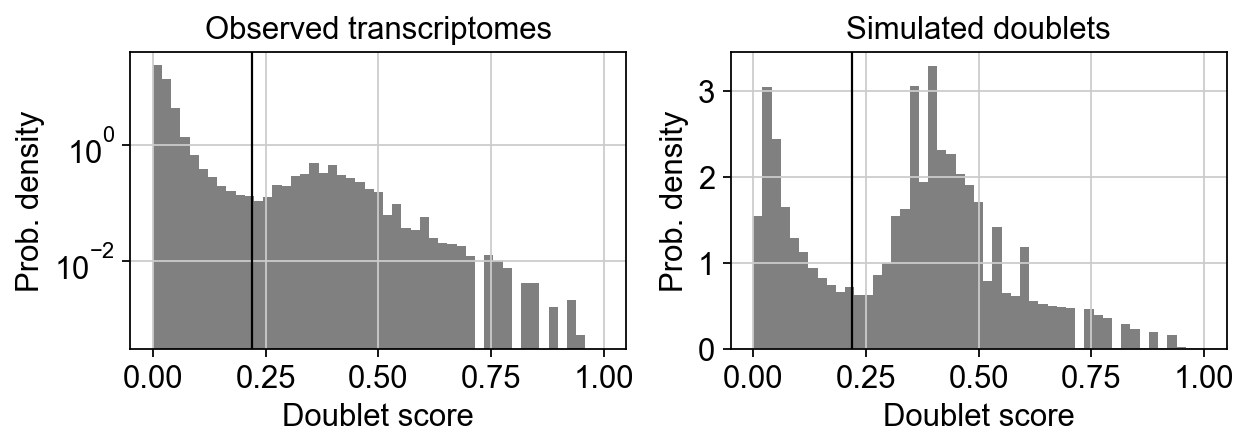

In [33]:
scrub.plot_histogram();

In [34]:
np.sum(predicted_doublets)/len(doublet_scores)

np.float64(0.08364088965853131)

In [35]:
adata = adata[~predicted_doublets,:]

In [36]:
adata

View of AnnData object with n_obs × n_vars = 84667 × 27845
    obs: 'area', 'age', 'idx', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'n_counts', 'mouse_id'
    var: 'n_cells'

/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/scanpy/preprocessing/_normalization.py:269: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:02)


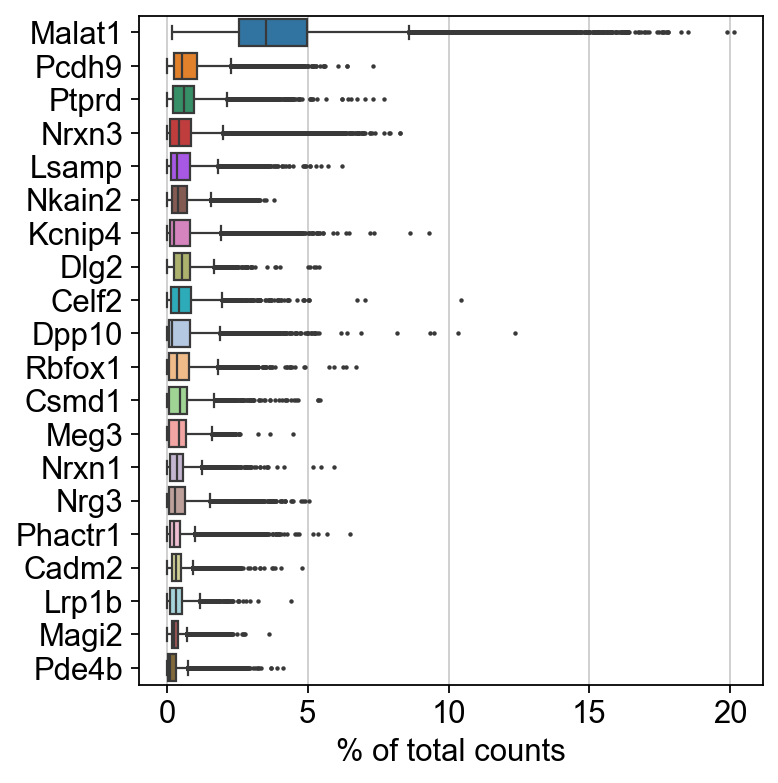

In [37]:
sc.pl.highest_expr_genes(adata, n_top=20, )


In [38]:
adata.write("adata_combined_nodoublet.h5ad")


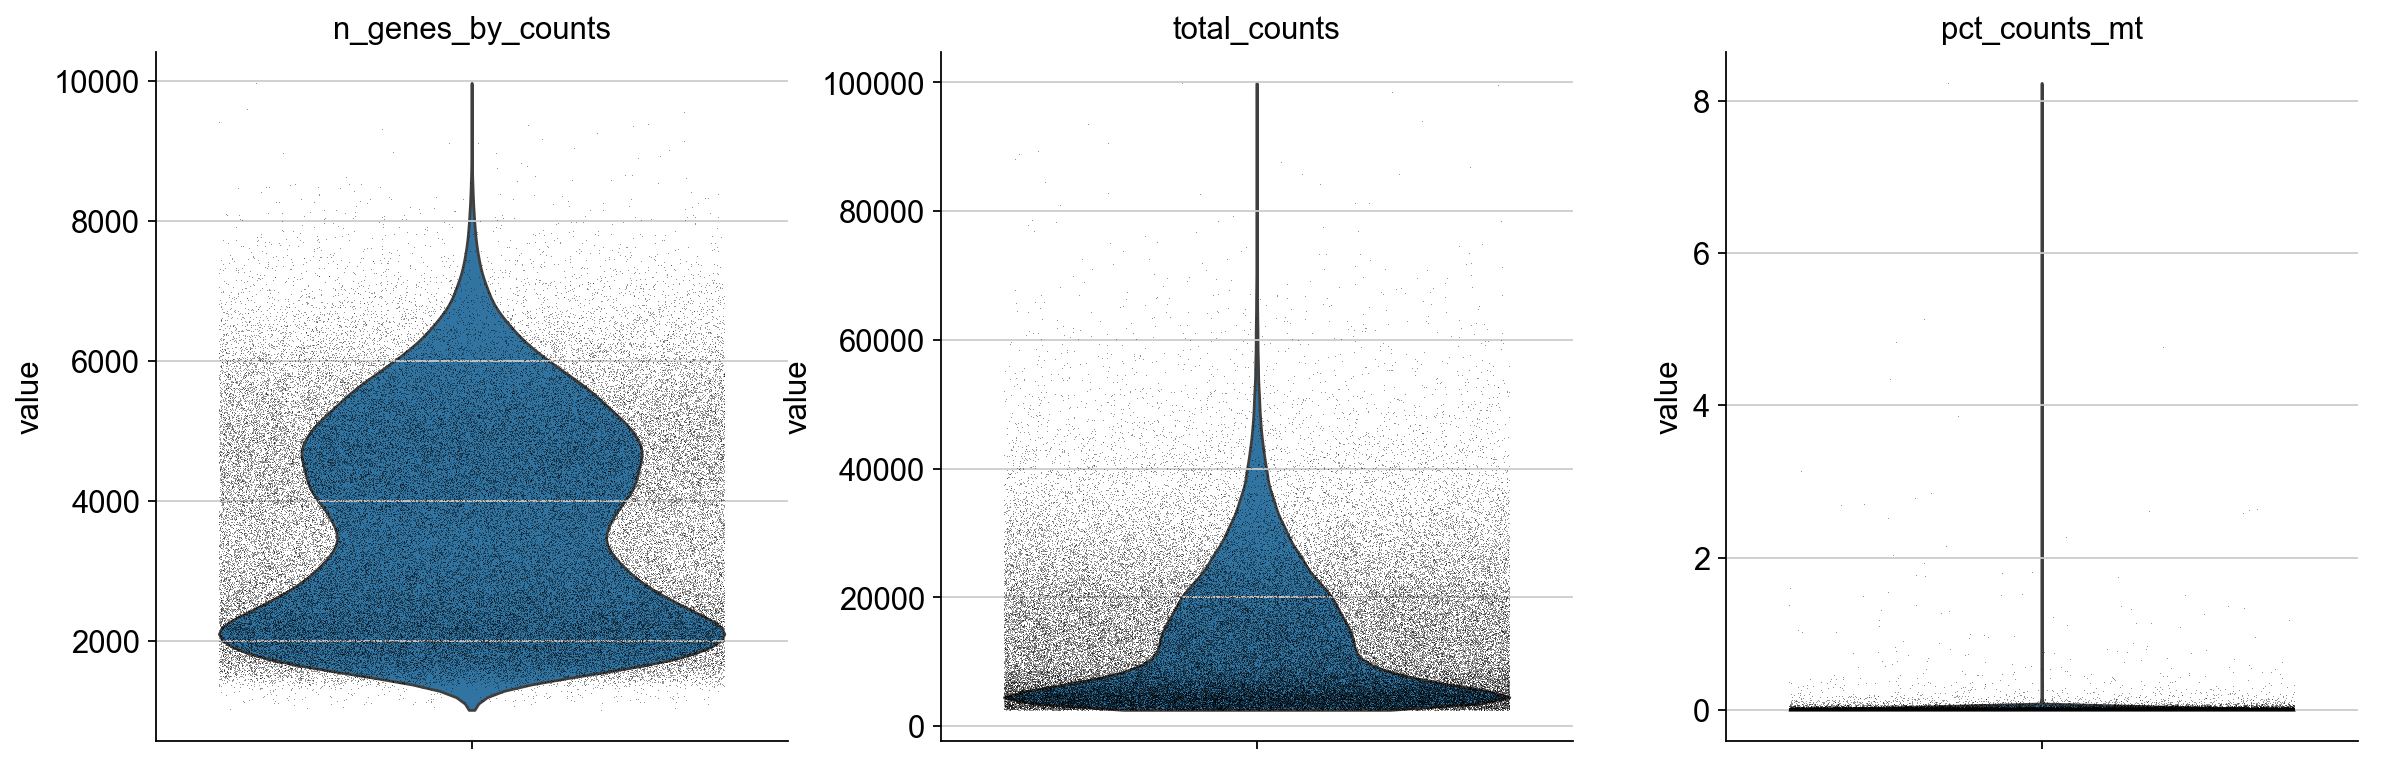

In [39]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True,size=0.25)

In [40]:

print(np.median(adata.obs.n_genes_by_counts))

3542.0


In [41]:
print(np.median(adata.obs.total_counts))

10889.0


In [42]:
adata

AnnData object with n_obs × n_vars = 84667 × 27845
    obs: 'area', 'age', 'idx', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'n_counts', 'mouse_id'
    var: 'n_cells'

In [43]:
sc.pp.normalize_total(adata, target_sum=1e4)

sc.pp.log1p(adata)

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


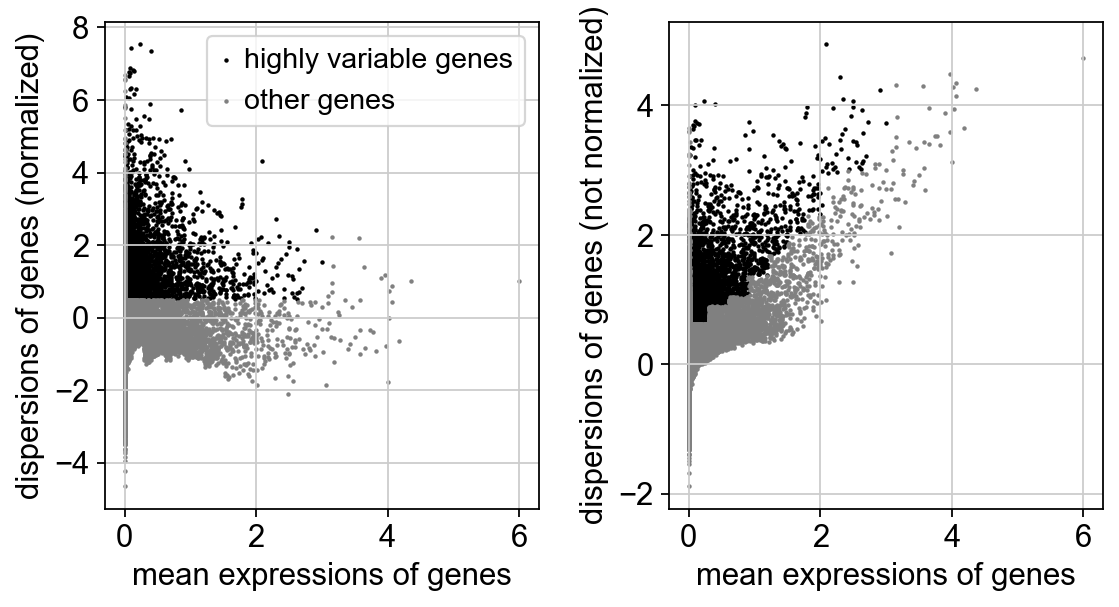

In [44]:
sc.pl.highly_variable_genes(adata)

In [45]:
adata.raw = adata

In [46]:
adata = adata[:, adata.var.highly_variable]

In [47]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']


/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/scanpy/preprocessing/_simple.py:729: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


    sparse input is densified and may lead to high memory use


/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/scanpy/preprocessing/_simple.py:667: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 1, 'A', False, aligned=True), Array(float64, 2, 'C', False, aligned=True))
  data[i] -= regressor[i] @ coeff
/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/scanpy/preprocessing/_simple.py:667: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 1, 'A', False, aligned=True), Array(float64, 2, 'C', False, aligned=True))
  data[i] -= regressor[i] @ coeff


    finished (0:00:05)


In [48]:
sc.pp.scale(adata, max_value=10)

In [49]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:10)


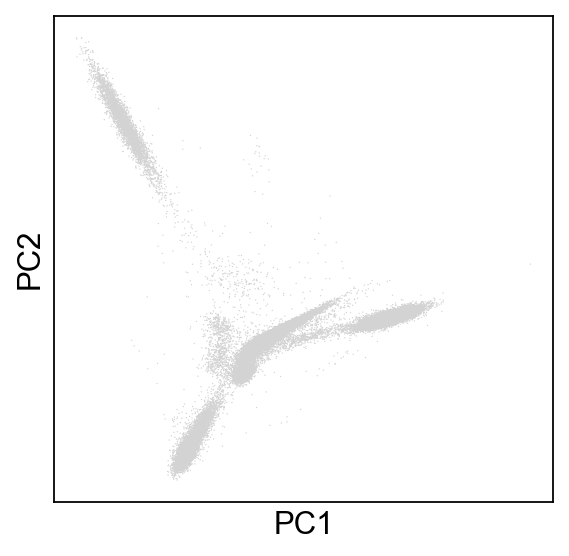

In [50]:
sc.pl.pca(adata)

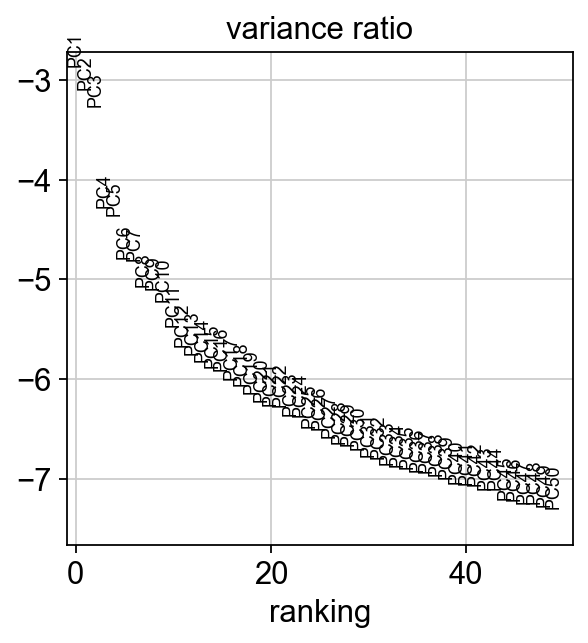

In [51]:
sc.pl.pca_variance_ratio(adata, log=True,n_pcs=50)

In [52]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50)

computing neighbors
    using 'X_pca' with n_pcs = 50


/opt/anaconda3/envs/qbproject/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:23)


In [53]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:44)


In [58]:
#import leiden
sc.tl.leiden(adata,resolution=0.2)

running Leiden clustering


/var/folders/m9/f9b1skd55v35_qp4hcflk2qh0000gp/T/ipykernel_90019/1785941302.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata,resolution=0.2)


    finished: found 22 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:05)


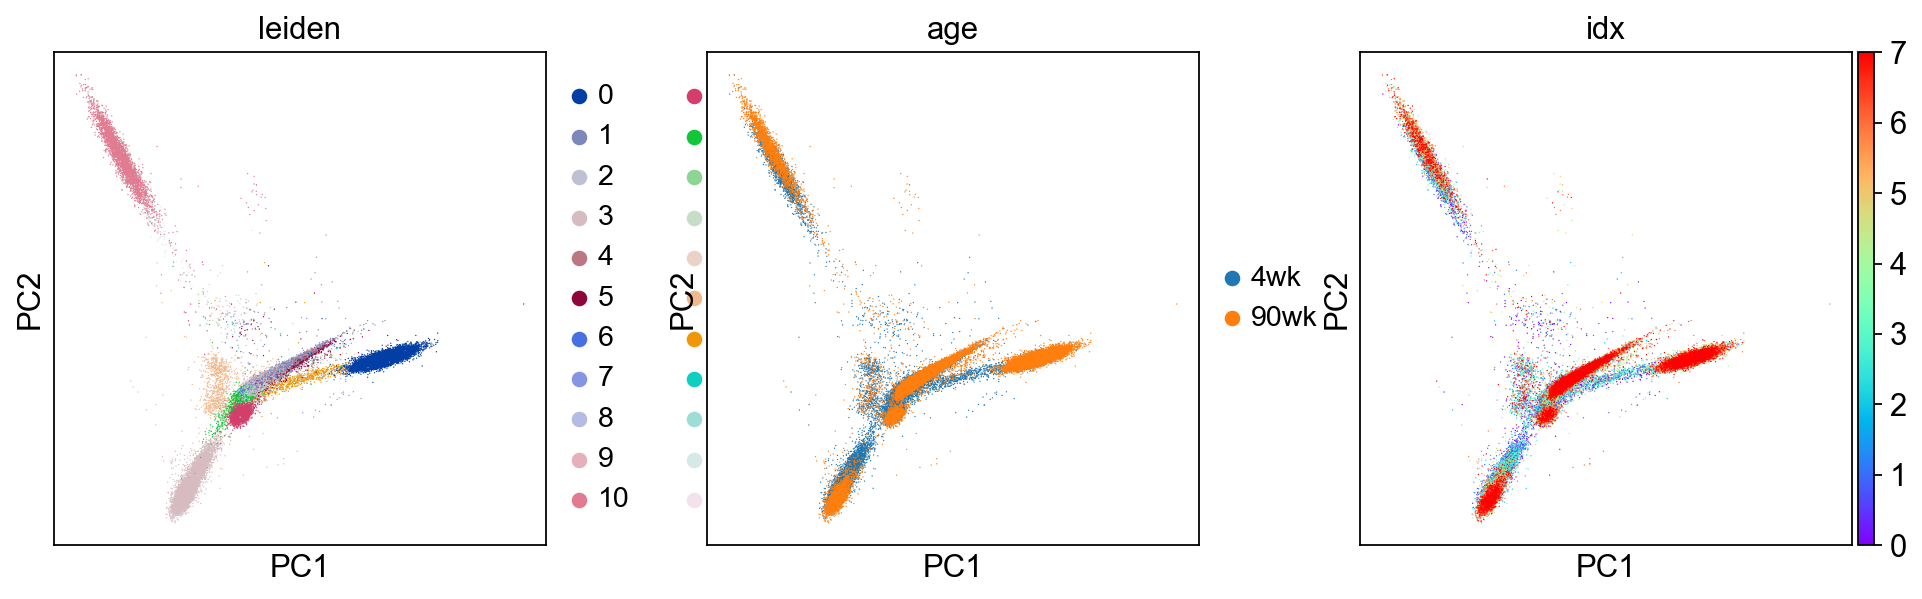

In [59]:
sc.pl.pca(adata,color=['leiden','age','idx'],color_map=plt.cm.rainbow)

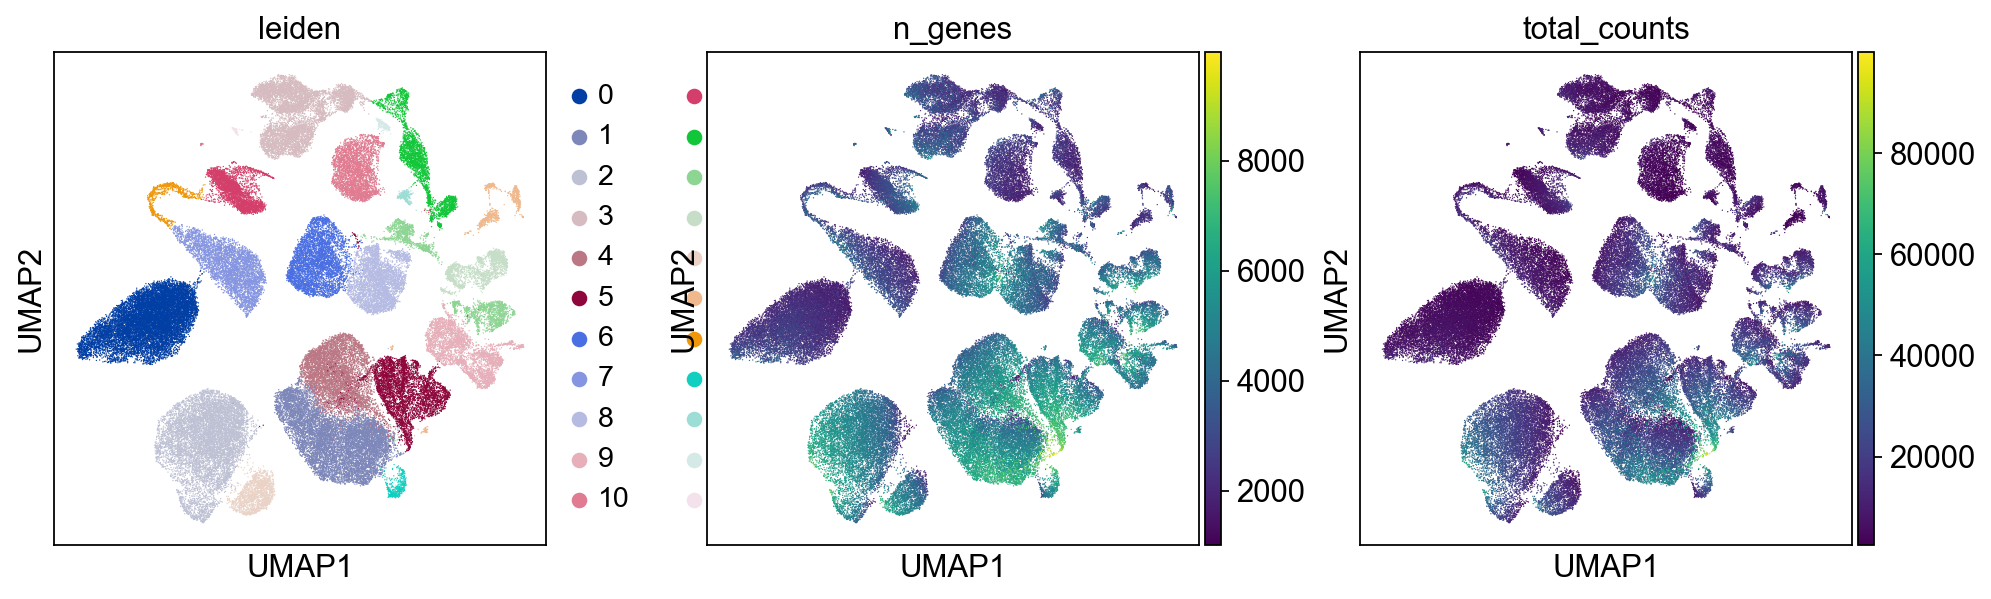

In [60]:
sc.pl.umap(adata, color=['leiden','n_genes','total_counts'],color_map=plt.cm.viridis)

In [61]:
adata.write("adata_combined_nodoublet_normalized.h5ad")

In [62]:
gene_ids = adata.raw.var_names
ens_idx = np.in1d(gene_ids, 'Snap25')

/var/folders/m9/f9b1skd55v35_qp4hcflk2qh0000gp/T/ipykernel_90019/3470635309.py:2: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  ens_idx = np.in1d(gene_ids, 'Snap25')


In [63]:
adata.raw.var

,n_cells,highly_variable,means,dispersions,dispersions_norm
Xkr4,84040,False,2.433123,2.016628,-0.977995
Gm1992,21711,False,0.176271,0.153823,-0.472235
Gm19938,37964,False,0.381440,0.338656,-0.725555
Gm37381,68,False,0.000523,0.570834,0.381065
Rp1,606,False,0.005943,0.872291,0.997916
...,...,...,...,...,...
4933409K07Rik,3844,False,0.020517,-0.266189,-1.331676
Gm10931,1249,False,0.006371,-0.222614,-1.242512
CT868723.1,157,False,0.000787,-0.130717,-1.054469
CAAA01147332.1,469,False,0.003624,0.369730,-0.030439


In [64]:
adata.obs['Snap25'] = adata.raw.X[:,ens_idx].mean(1)

/var/folders/m9/f9b1skd55v35_qp4hcflk2qh0000gp/T/ipykernel_90019/696871918.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.hist(adata.obs.groupby('leiden')['Snap25'].apply(np.mean).to_numpy(),100)


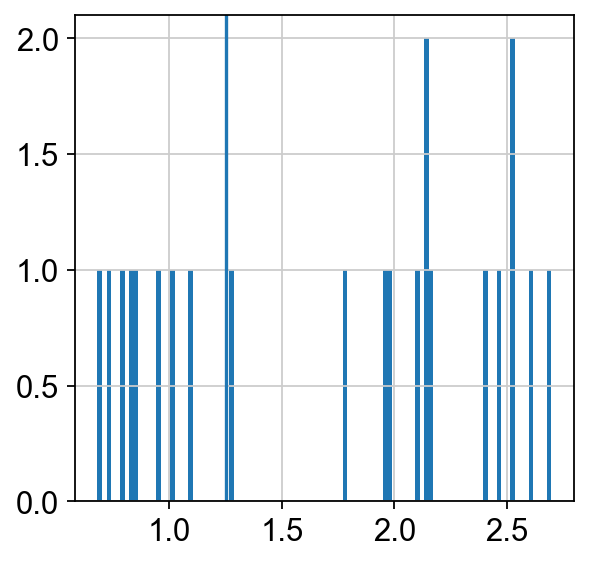

In [65]:
plt.hist(adata.obs.groupby('leiden')['Snap25'].apply(np.mean).to_numpy(),100)
plt.axvline(1.25)

In [66]:
is_cluster_neuronal = (adata.obs.groupby('leiden')['Snap25'].apply(np.mean).to_numpy()>1.25)
neuronal_map = dict(zip([str(i) for i in range(len(is_cluster_neuronal))],is_cluster_neuronal))


/var/folders/m9/f9b1skd55v35_qp4hcflk2qh0000gp/T/ipykernel_90019/1574728360.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  is_cluster_neuronal = (adata.obs.groupby('leiden')['Snap25'].apply(np.mean).to_numpy()>1.25)


In [68]:
# computer cluster mean expression for each gene
adata.obs['neuronal'] = [neuronal_map[i] for i in adata.obs.leiden]

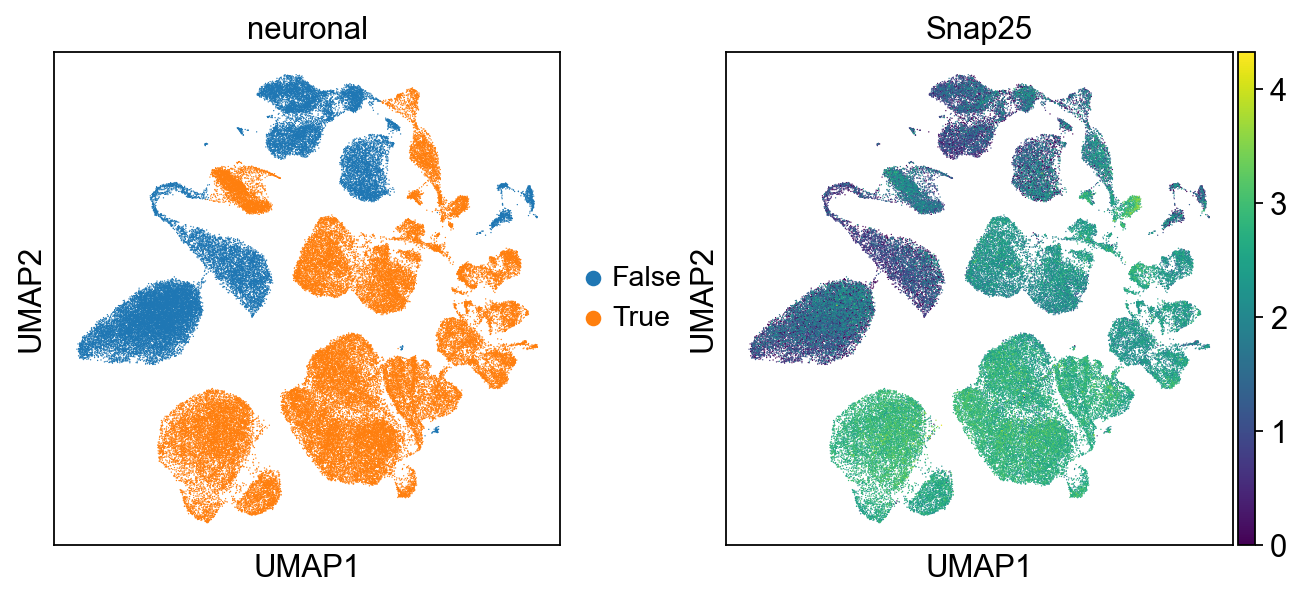

In [69]:
sc.pl.umap(adata,color=['neuronal','Snap25'])

In [76]:
print(adata.var_names)

Index(['Lypla1', 'Rgs20', 'Oprk1', 'St18', 'Rrs1', 'Adhfe1', '2610203C22Rik',
       'Mybl1', '1700034P13Rik', 'Cpa6',
       ...
       'mt-Nd2', 'mt-Co1', 'mt-Co2', 'mt-Atp6', 'mt-Co3', 'mt-Nd3', 'mt-Nd4',
       'mt-Nd5', 'mt-Cytb', 'CAAA01118383.1'],
      dtype='object', length=3754)


In [74]:
sc.pl.dotplot(adata, 
              ['Cx3cr1', 'Aldh1l1','Olig1','Cspg4', 'Snap25', 'Gad1', 'Slc17a6', 'Slc17a7'],
              groupby='leiden',
              use_raw=False)


KeyError: "Could not find keys [np.str_('Slc17a7')] in columns of `adata.obs` or in adata.var_names."

In [71]:
# subset by neurons in PFC and Hyp
adata_neuronal = adata[adata.obs.neuronal].copy()
adata_neuronal = adata_neuronal.raw.to_adata()

In [ ]:
adata_neuronal_pfc = adata_neuronal[adata_neuronal.obs.area == 'PFC'].copy()
adata_neuronal_hyp = adata_neuronal[adata_neuronal.obs.area == 'Hyp'].copy()


In [ ]:
def reprocess_subset(A,res=0.7):
    # assumes data have already been normalized/log transformed
    print('finding highly variable genes')
    sc.pp.highly_variable_genes(A, min_mean=0.0125, max_mean=3, min_disp=0.5)
    A.raw = A
    A = A[:, A.var.highly_variable]
    print('regressing out')
    sc.pp.regress_out(A, ['total_counts', 'pct_counts_mt'])
    print('scaling')
    sc.pp.scale(A, max_value=10)
    print('pca')
    sc.tl.pca(A, svd_solver='arpack')
    print('neighbors')
    sc.pp.neighbors(A, n_neighbors=10, n_pcs=50)
    print('umap')
    sc.tl.umap(A)
    print('leiden')
    sc.tl.leiden(A,resolution=res)
    return A

In [ ]:
adata_neuronal_pfc = reprocess_subset(adata_neuronal_pfc)

In [ ]:
sc.pl.umap(adata_neuronal_pfc, color=['age'])

In [ ]:
sc.external.pp.bbknn(adata_neuronal_pfc,batch_key='age')
sc.tl.leiden(adata_neuronal_pfc,resolution=0.6)
sc.tl.umap(adata_neuronal_pfc)

In [ ]:
sc.pl.umap(adata_neuronal_pfc, color=['leiden','age','mouse_id'],color_map=mouse_colors)


In [ ]:
sc.pl.umap(adata_neuronal_pfc, color='age')


In [ ]:
sc.pl.umap(adata_neuronal_pfc, 
           color=['Slc17a7','Gad1','Drd1','Drd2','Sst','Vip','Pvalb',
                  'Cux1','Tshz2','Cd44','Vegfd','Pld5','Otof','Npr3'],
          use_raw=True)

In [ ]:
sc.tl.rank_genes_groups(adata_neuronal_pfc, 'leiden', method='wilcoxon')
#sc.pl.rank_genes_groups(adata_neuronal_pfc, n_genes=25, sharey=False)

In [ ]:
sc.tl.filter_rank_genes_groups(adata_neuronal_pfc, min_fold_change=1.5)
sc.pl.rank_genes_groups_dotplot(adata_neuronal_pfc, key='rank_genes_groups_filtered')


In [ ]:
sc.pl.rank_genes_groups_heatmap(adata_neuronal_pfc,n_genes=5,groupby='leiden',show_gene_labels=True)


In [ ]:
adata_nonneuronal = adata[~adata.obs.neuronal].copy()
adata_nonneuronal = adata_nonneuronal.raw.to_adata()

In [ ]:
adata_nonneuronal = reprocess_subset(adata_nonneuronal)

In [ ]:
#sc.external.pp.bbknn(adata_nonneuronal,batch_key='mouse_id')
#sc.tl.leiden(adata_nonneuronal,resolution=1.2)
#sc.tl.umap(adata_nonneuronal)

In [ ]:
sc.tl.leiden(adata_nonneuronal,resolution=0.7)

In [ ]:
sc.pl.umap(adata_nonneuronal, color=['leiden'])

In [ ]:
sc.pl.umap(adata_nonneuronal, color=['leiden','area','age','mouse_id'],color_map=mouse_colors)


In [ ]:
sc.pl.umap(adata_nonneuronal, color=['Cdkn2a','Aldh1l1','Cx3cr1','Plp1','Cspg4',
                                     'Gfap','Aqp4','Cldn5','Adgrf5'])

In [ ]:
old_to_new = dict(
    old_cluster1='new_cluster1',
    old_cluster2='new_cluster1',
    old_cluster3='new_cluster2',
)
adata.obs['new_clusters'] = (
    adata.obs['old_clusters']
    .map(old_to_new)
    .astype('category')
)

In [ ]:
sc.external.pp.bbknn(adata,batch_key='mouse_id')
sc.tl.leiden(adata,resolution=0.2)
sc.tl.umap(adata)

In [ ]:
fig = sc.pl.umap(adata, color=['age','area','mouse_id'],color_map=mouse_colors,return_fig=True)
fig.savefig("/Users/wea/src/tithonus/analysis/aging10x/umap.png",dpi=300,bbox_inches='tight')


In [ ]:
sc.pl.umap(adata, color=['Cx3cr1', 'Aldh1l1','Olig1','Cspg4', 'Snap25', 'Gad1', 'Slc17a6', 'Slc17a7'],color_map=plt.cm.Reds)

In [ ]:
sc.pl.umap(adata, color=['Vip','Gal','Sst','Cck','Npy','Oxt','Nxph4','Agtr1a','Agrp','Esr1'],cmap=plt.cm.coolwarm,vmin=-5,vmax=5)


In [ ]:
sc.pl.umap(adata, color=['C1qa','C3','Itgam','Trem2'],cmap=plt.cm.coolwarm,use_raw=True,vmin=-3,vmax=3)


In [ ]:
sc.pl.umap(adata, color=['Cdkn2a','C2','C4b','Tspan2','Il33','Aldh1l1','Cd4','Cd74','Agtr1a'],color_map=plt.cm.Reds,use_raw=True)


In [ ]:
sc.pl.umap(adata, color=[i for i in list(adata.raw.var_names) if 'Il' in i],color_map=plt.cm.Reds,use_raw=True)


In [ ]:
sc.pl.umap(adata, color=[i for i in list(adata.raw.var_names) if 'H2-' in i],color_map=plt.cm.coolwarm,use_raw=True,vmin=-3,vmax=3)


In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

In [6]:
import anndata as ad

# Load the h5ad file
adata = ad.read_h5ad("adata_combined_nodoublet_normalized.h5ad", backed=None)

# Write a compressed version for R
adata.write_h5ad("adata_for_seurat.h5ad", compression="gzip")
